In [1]:
import pandas as pd
import numpy as np

data_out_directory = "/Users/leonahammelrath/FU_Psychoinformatik/Github/blueswatch_open/outcomes/dataframes"


# Wearable data

In [2]:
data_14 = pd.read_csv("data_Full_14.csv")

In [3]:
data_all = pd.read_csv("data_Full_1.csv")

In [4]:
data_all = data_all.dropna()

In [5]:
data_all.shape

(602, 23)

In [10]:
idlist = data_all.id.tolist()

In [6]:
data_pre = pd.read_csv("data_pre_1.csv")

In [11]:
data_pre = data_pre[["id", "source"]]

<AxesSubplot:ylabel='id'>

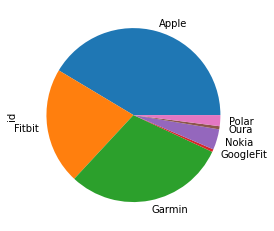

In [28]:
data_pre.groupby("source").id.count().plot(kind="pie")

In [14]:
data_all = data_all.merge(data_pre, how="left", left_on="id", right_on="id")

In [26]:
data_all.groupby("PRE_sex").id.count()

PRE_sex
0.0    226
1.0    376
Name: id, dtype: int64

In [24]:
bins= [20,30,40,50,60, 70, 80]

data_all['AgeGroup'] = pd.cut(data_all['age'], bins=bins, right=False)



<AxesSubplot:xlabel='AgeGroup'>

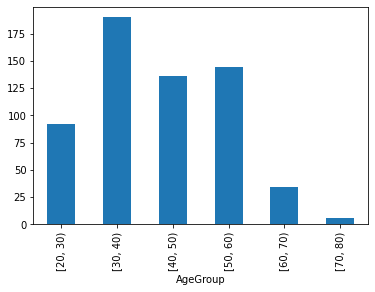

In [25]:
data_all.groupby("AgeGroup").id.count().plot(kind="bar")

In [ ]:
data_all.groupby("PRE_se")

In [11]:
data_all.age.describe()

count    602.000000
mean      42.227575
std       11.444420
min       20.000000
25%       33.000000
50%       40.000000
75%       52.000000
max       75.000000
Name: age, dtype: float64

In [12]:
data_all_bw3 = pd.read_csv("data_Full_bw3_1.csv")

In [13]:
data_all_bw3.shape

(1147, 9)

# Questionnaire data BW4

In [15]:
files_directory = "/Users/leonahammelrath/FU_Psychoinformatik/Github/blueswatch_open/data"

In [12]:
answers = pd.read_csv("%s/answers.csv" % files_directory)

In [13]:
answers["user"] = answers.user.str[:-13]

In [14]:
answers.drop(["order", "value"], axis=1, inplace=True)

In [15]:
answers["element"] = answers['element'].fillna(0)

In [16]:
answers['element'] = answers['element'].astype(int)

In [17]:
answers.loc[answers.questionnaire == 33].user.nunique()

1462

# Questionnaire data BW3

In [16]:
df_tk = pd.read_csv("%s/export_data_leona_20230606.csv" % files_directory)#.dropna(subset=["studyInfo_BW", 'PRE_screening_start'])

In [19]:
#df_tk.drop("studyInfo_BW", axis=1, inplace=True)

In [17]:
df_tk.PRE_screening_start = pd.to_datetime(
    df_tk.PRE_screening_start)

In [18]:
df_tk["year"] = df_tk.PRE_screening_start.dt.year

In [19]:
df_tk["age"] = df_tk["year"] - df_tk["PRE_birth"]

In [20]:
df_tk["phq_sum"] = df_tk[['PRE_phqD1',
       'PRE_phqD2', 'PRE_phqD3', 'PRE_phqD4', 'PRE_phqD5', 'PRE_phqD6',
       'PRE_phqD7', 'PRE_phqD8']].sum(axis=1)

In [21]:
df_tk["phq_cat"] = np.where((df_tk["phq_sum"] >= 10),1,0)


In [23]:
df_tk.token_BW.nunique()

1488

In [25]:
#df_tk["user"] = df_tk.token_BW.str[:-13]

In [28]:
df_tk.to_csv("%s/tk_questionnaire.csv" % (data_out_directory), index=False)


In [29]:
df_tk.rename(columns = {"PRE_phqD1": "phq1", "PRE_phqD2": "phq2","PRE_phqD3": "phq3", "PRE_phqD4": "phq4", 
                        "PRE_phqD5": "phq5","PRE_phqD6": "phq6", "PRE_phqD7": "phq7", "PRE_phqD8": "phq8",
                       "PRE_screening_start": "createdAt", "PRE_sex": "gender", "PRE_gad4" : "gad_score"}, inplace=True)

In [30]:
df_tk = df_tk.sort_values('createdAt').drop_duplicates(['user'], keep='last')

In [33]:
df_tk.drop(["year", "PRE_birth"], axis=1, inplace=True)

### Import questionnaire session df

In [34]:
questionnaire_sessions = pd.read_csv(
    "%s/questionnaireSession.csv" % files_directory).dropna(subset=["completedAt"])

In [35]:
questionnaire_sessions.head()

,id,user,study,questionnaire,sessionRun,expirationTimestamp,createdAt,completedAt
0,401,WJsWrP1Xev01GocU,0,8,0,1716121352086,1629721356420,1.629721e+12
1,402,LBeMVYErEObeKkjG,0,8,0,1716121911575,1629721937171,1.629753e+12
2,408,UtvvYGu9GvdcphfU,0,8,0,1716214556206,1629814605470,1.629815e+12
5,415,rzf2IwN7UR3WZ5KR,0,8,1,1716294377585,1629895661716,1.629896e+12
8,423,JzbUmjsKqr1WAKha,0,8,0,1716465968571,1630065983082,1.630066e+12


In [36]:
questionnaire_sessions.completedAt = pd.to_datetime(
    questionnaire_sessions.completedAt, unit="ms")
questionnaire_sessions["day"] = questionnaire_sessions.completedAt.dt.normalize()
questionnaire_sessions["user"] = questionnaire_sessions.user.str[:-13]

In [37]:
questionnaire_sessions.groupby("questionnaire")["user"].nunique() # 45= BW4, 33= BW3 und früher

questionnaire
8     1047
30       5
31     628
33    1454
45     192
Name: user, dtype: int64

### Import choice df

In [38]:
choice = pd.read_csv("%s/choice.csv" % files_directory)

In [39]:
choice.drop(["unique","question", "catch", "image_body", "image_contentType", "image_lastModified"], axis=1, inplace=True)

In [40]:
answers = answers.merge(choice, left_on="element", right_on="element", how="outer")

In [41]:
answers['question']= answers['question'].fillna(0)

In [42]:
answers['question'] = answers['question'].astype(int)

In [43]:
answers['choice_id']= answers['choice_id'].fillna(0)

In [44]:
answers['choice_id'] = answers['choice_id'].astype(int)

In [45]:
questions = pd.read_csv("%s/questions.csv" % files_directory)

In [46]:
questions.drop(["text", "description", "type"], axis=1, inplace=True)

In [47]:
answers = answers.merge(questions, left_on = "question", right_on = "id", how = "outer")

In [48]:
answers.drop(["id_y"], axis=1, inplace=True)

## Calculate Age 

In [49]:
answers["createdAt"] = pd.to_datetime(answers["createdAt"], unit="ms").dt.normalize()

In [50]:
answers["create_year"] = answers["createdAt"].dt.year

In [51]:
answers_age = answers.loc[answers['question'] == 18]


In [52]:
answers_age = answers_age[["user", "text", "create_year", "createdAt"]]

In [53]:
answers_age = answers_age.sort_values('createdAt').drop_duplicates(['user'], keep='last')

In [54]:
answers_age["text"] = answers_age["text"].astype(int)

In [55]:
answers_age["age"] = answers_age["create_year"] - answers_age["text"]

In [56]:
answers_age.drop(["text", "create_year", "createdAt"], axis=1, inplace=True)

In [57]:
answers= answers.merge(answers_age, left_on="user", right_on="user", how= "outer")

## Create Gender Column

In [58]:
answers_gender = answers.loc[answers['question'] == 19]

In [59]:
answers_gender = answers_gender[["user", "choice_id","createdAt"]]

In [60]:
answers_gender = answers_gender.sort_values('createdAt').drop_duplicates(['user'], keep='last')

In [61]:
answers_gender["gender"] = answers_gender["choice_id"]*10

In [62]:
answers_gender.drop(["createdAt", "choice_id"], axis=1, inplace=True)

In [63]:
answers= answers.merge(answers_gender, left_on="user", right_on="user", how= "outer")

In [64]:
answers.drop(["text", "create_year"], axis=1, inplace= True)

## Create PHQ Values

### PHQ1

In [65]:
answers_phq = answers[answers.question.isin([228, 229, 230, 231, 232, 233, 234, 235])]

In [66]:
answers_phq1 = answers_phq.loc[answers['question'] == 228]
answers_phq1 = answers_phq1.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq1["phq1"] = answers_phq1["choice_id"]
answers_phq1 = answers_phq1[["user","phq1"]]

answers = answers.merge(answers_phq1, left_on="user", right_on="user", how= "outer")

### PHQ2

In [67]:
answers_phq2 = answers_phq.loc[answers['question'] == 229]
answers_phq2 = answers_phq2.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq2["phq2"] = answers_phq2["choice_id"]
answers_phq2 = answers_phq2[["user","phq2"]]

answers = answers.merge(answers_phq2, left_on="user", right_on="user", how= "outer")

### PHQ3

In [68]:
answers_phq3 = answers_phq.loc[answers['question'] == 230]
answers_phq3 = answers_phq3.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq3["phq3"] = answers_phq3["choice_id"]
answers_phq3 = answers_phq3[["user","phq3"]]

answers = answers.merge(answers_phq3, left_on="user", right_on="user", how= "outer")

### PHQ4


In [69]:
answers_phq4 = answers_phq.loc[answers['question'] == 231]
answers_phq4 = answers_phq4.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq4["phq4"] = answers_phq4["choice_id"]
answers_phq4 = answers_phq4[["user","phq4"]]

answers = answers.merge(answers_phq4, left_on="user", right_on="user", how= "outer")

### PHQ5

In [70]:
answers_phq5 = answers_phq.loc[answers['question'] == 232]
answers_phq5 = answers_phq5.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq5["phq5"] = answers_phq5["choice_id"]
answers_phq5 = answers_phq5[["user","phq5"]]

answers = answers.merge(answers_phq5, left_on="user", right_on="user", how= "outer")

### PHQ6


In [71]:
answers_phq6 = answers_phq.loc[answers['question'] == 233]
answers_phq6 = answers_phq6.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq6["phq6"] = answers_phq6["choice_id"]
answers_phq6 = answers_phq6[["user","phq6"]]

answers = answers.merge(answers_phq6, left_on="user", right_on="user", how= "outer")

### PHQ7


In [72]:
answers_phq7 = answers_phq.loc[answers['question'] == 234]
answers_phq7 = answers_phq7.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq7["phq7"] = answers_phq7["choice_id"]
answers_phq7 = answers_phq7[["user","phq7"]]

answers = answers.merge(answers_phq7, left_on="user", right_on="user", how= "outer")

### PHQ8

In [73]:
answers_phq8 = answers_phq.loc[answers['question'] == 235]
answers_phq8 = answers_phq8.sort_values('createdAt').drop_duplicates(['user'], keep='first')
answers_phq8["phq8"] = answers_phq8["choice_id"]
answers_phq8 = answers_phq8[["user","phq8"]]

answers = answers.merge(answers_phq8, left_on="user", right_on="user", how= "outer")

## Extract GAD values

In [74]:
answer_gad = answers.loc[answers.question == 249]

In [75]:
answer_gad = answer_gad[["user", "choice_id","createdAt"]]

In [76]:
answer_gad = answer_gad.sort_values('createdAt').drop_duplicates(['user'], keep='first')

In [77]:
answer_gad["gad_score"] = answer_gad["choice_id"]

In [78]:
answer_gad = answer_gad[["user", "gad_score"]]

In [79]:
answers= answers.merge(answer_gad, left_on="user", right_on="user", how= "outer")

In [80]:
test = answers.loc[answers.question == 233]

## Create PHQ score for BluesWatch Eingangsbefragung (Study 21) 

In [81]:
answers_phq = answers_phq.loc[answers_phq['questionnaire']== 45]

In [82]:
answers_phq= answers_phq[["user", "question", "createdAt", "element", "choice_id"]]

In [83]:
answers_phq_grouped = answers_phq.groupby(["user", "createdAt"])["choice_id"].sum()

In [84]:
answers_phq_grouped = answers_phq_grouped.reset_index()

In [85]:
answers_phq_grouped.rename(columns = {"choice_id": "phq_sum", "createdAt": "phq_create"}, inplace=True)

In [86]:
answers_phq_grouped["phq_cat"] = np.where((answers_phq_grouped["phq_sum"] >= 10),1,0)


In [87]:
answers_phq_grouped = answers_phq_grouped.sort_values('phq_create').drop_duplicates(['user'], keep='first')

In [88]:
answers = answers.merge(answers_phq_grouped, left_on="user", right_on="user", how= "outer")

In [89]:
answers_final = answers[['user', 'createdAt', 'age',
       'gender', 'phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7',
       'phq8', 'gad_score','phq_cat' ]]

In [90]:
answers_final = answers_final.sort_values('createdAt').drop_duplicates(['user'], keep='first')

In [91]:
answers_final.groupby("user")["createdAt"].count().max()

1

In [92]:
answers_final = answers_final.merge(df_tk, how="outer", left_on=['user', 'createdAt','age', 'gender', 'phq1', 'phq2', 'phq3', 'phq4',
       'phq5', 'phq6', 'phq7', 'phq8', 'gad_score', 'phq_cat'], right_on=['user','createdAt', 'age', 'gender', 'phq1', 'phq2', 'phq3', 'phq4',
       'phq5', 'phq6', 'phq7', 'phq8', 'gad_score', 'phq_cat'])

In [93]:
answers_final.dropna(subset = ["phq8"], inplace= True)

In [94]:
answers_final = answers_final.sort_values('createdAt').drop_duplicates(['user'], keep='first')

In [95]:
answers_final.user.nunique()

1470

## Merge wearables and questionnaires 

## Heart Rate

In [96]:
data_all.groupby("phq_cat")["id"].count()

phq_cat
0    315
1    287
Name: id, dtype: int64

In [97]:
data_all.id.nunq

AttributeError: 'Series' object has no attribute 'nunq'